In [1]:
#Analise de Dados do jogo FIFA 2018
#Alunos: Alexandre Martins / Matheus Constantino
#Trabalho de Laboratorio de Banco de Dados
#5ºsemestre

In [2]:
#Imports de Libs
import pandas as pd
import re
import seaborn as sns
import numpy as np

In [5]:
#fazendo leitura do arquivo para analise de dados
data = pd.read_csv('CompleteDataset.csv')
print('Arquivo Lido!')

Arquivo Lido!


In [6]:
#Excluindo algumas colunas que não são de interesse para analise
data.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club Logo'], axis = 1, inplace = True)
print('Colunas Excluidas!')

Colunas Excluidas!


In [7]:
#renomeando a coluna Wage para salario e alterando para ser do tipo numérico
data['salario'] = data['Wage'].map(lambda x : re.sub('[^0-9]+', '', x)).astype('float64')
print('Salario alterado!')

Salario alterado!


In [8]:
#colocando colunas estranhas para o formato desejado
def transform(value):
  out = str(value)
  if '+' in out:
    a,b = out.split('+')
    out = int(a)+int(b)
  elif '-' in out:
    a,b = out.split('-')
    if len(a)== 0: out = -1
    else: out = int(a)-int(b)
  elif out == '':
    out = 0
    
    return float(out)
    

In [9]:
for i in range(9,44):
  data.iloc[:,i] = data.iloc[:,i].apply(lambda x: transform(x))

In [10]:
#quantidade total de países
#a função nunique retorna a quantidade de valores únicos em um objeto
data.Nationality.nunique() 

165

In [11]:
#os paises com maior numero de jogadores
data['Nationality'].value_counts()

England                1630
Germany                1140
Spain                  1019
France                  978
Argentina               965
Brazil                  812
Italy                   799
Colombia                592
Japan                   469
Netherlands             429
Republic of Ireland     417
United States           381
Chile                   375
Sweden                  368
Portugal                367
Mexico                  360
Denmark                 346
Poland                  337
Norway                  333
Korea Republic          330
Saudi Arabia            329
Russia                  306
Scotland                300
Turkey                  291
Belgium                 272
Austria                 266
Switzerland             233
Australia               227
Uruguay                 153
Serbia                  133
                       ... 
Namibia                   2
Kuwait                    2
Libya                     2
Thailand                  2
Ethiopia            

In [12]:
#media de idades
data.Age.mean()

25.144541460430453

In [13]:
#quantidade de jogadores por idade
data['Age'].value_counts()

25    1522
23    1394
24    1334
22    1324
21    1286
20    1245
26    1202
27    1152
29    1121
19    1069
28    1051
30     804
18     672
31     671
33     617
32     506
34     272
17     258
35     191
36     136
37      69
38      36
39      20
16      13
40       8
41       3
43       2
44       2
47       1
Name: Age, dtype: int64

In [14]:
#media de idade por club
mediaPorClub = data.groupby('Club').Age.mean()

In [15]:
print(mediaPorClub)

Club
 SSV Jahn Regensburg        24.571429
1. FC Heidenheim            24.615385
1. FC Kaiserslautern        22.620690
1. FC Köln                  24.166667
1. FC Magdeburg             25.200000
1. FC Nürnberg              24.714286
1. FC Union Berlin          25.370370
1. FSV Mainz 05             24.200000
AC Ajaccio                  25.375000
AC Horsens                  24.166667
AD Alcorcón                 28.360000
ADO Den Haag                24.384615
AEK Athens                  24.857143
AFC Eskilstuna              24.370370
AFC Wimbledon               24.629630
AIK Solna                   25.166667
AJ Auxerre                  23.800000
AS Monaco                   23.424242
AS Nancy Lorraine           26.307692
AS Saint-Étienne            23.800000
AZ Alkmaar                  23.000000
Aalborg BK                  23.259259
Aalesunds FK                23.727273
Aarhus GF                   24.259259
Aberdeen                    24.541667
Accrington Stanley          22.541667
Adelaid

In [16]:
#media de salario/semana
data.salario.mean()
 
#média de salário por clube
mediaSalarioPorClub = data.groupby('Club').salario.mean()
 
#quanto cada clube gasta com salarios
#o sort_values foi usado para ordenar os valores do maior para o menor
gastoComSalario = data.groupby('Club').salario.sum().sort_values(ascending = False) 
 
#overall por idade
RatingPorIdade = data.groupby('Age').Overall.agg(['min','max','mean'])
 
#potencial por idade
potencialPorIdade = data.groupby('Age').Potential.agg(['min','max','mean'])

In [19]:
#media de idade por club
mediaPorClub = data.groupby('Club').Age.mean()

In [20]:
print(mediaSalarioPorClub)

Club
 SSV Jahn Regensburg         4.142857
1. FC Heidenheim             8.153846
1. FC Kaiserslautern         6.275862
1. FC Köln                  25.366667
1. FC Magdeburg              1.080000
1. FC Nürnberg               7.214286
1. FC Union Berlin          16.851852
1. FSV Mainz 05             19.566667
AC Ajaccio                   2.833333
AC Horsens                   2.125000
AD Alcorcón                  6.160000
ADO Den Haag                 6.307692
AEK Athens                   1.000000
AFC Eskilstuna               1.444444
AFC Wimbledon                3.518519
AIK Solna                    3.833333
AJ Auxerre                   4.366667
AS Monaco                   26.272727
AS Nancy Lorraine            4.192308
AS Saint-Étienne            21.433333
AZ Alkmaar                   7.111111
Aalborg BK                   3.666667
Aalesunds FK                 1.772727
Aarhus GF                    4.296296
Aberdeen                     5.291667
Accrington Stanley           2.416667
Adelaid

In [22]:
#Gasto salarial de cada club
print(gastoComSalario)

Club
FC Barcelona               4792.0
Real Madrid CF             4751.0
Manchester United          3653.0
Chelsea                    3537.0
FC Bayern Munich           3273.0
Juventus                   3165.0
Manchester City            3152.0
Arsenal                    3007.0
Liverpool                  2664.0
Everton                    2499.0
Paris Saint-Germain        2198.0
Tottenham Hotspur          2179.0
West Ham United            1935.0
Milan                      1814.0
Borussia Dortmund          1705.0
Southampton                1689.0
Napoli                     1624.0
Roma                       1618.0
Atlético Madrid            1581.0
Leicester City             1423.0
Stoke City                 1383.0
Swansea City               1377.0
Fenerbahçe SK              1373.0
Zenit St. Petersburg       1363.0
Inter                      1336.0
Newcastle United           1323.0
VfL Wolfsburg              1312.0
Watford                    1283.0
Galatasaray SK             1274.0
Bournemou

In [23]:
#overall por idade
print(RatingPorIdade)

     min  max       mean
Age                     
16    51   65  57.846154
17    46   76  56.089147
18    46   83  57.287202
19    47   80  59.430309
20    48   83  61.559839
21    48   84  63.395023
22    48   84  64.762085
23    50   88  66.117647
24    50   88  67.182909
25    49   92  68.008541
26    50   90  68.643927
27    51   90  68.943576
28    46   91  69.058040
29    52   90  69.722569
30    49   93  69.847015
31    52   92  69.767511
32    48   94  69.468379
33    51   88  69.709887
34    49   86  68.911765
35    54   88  69.151832
36    52   85  69.080882
37    52   80  68.536232
38    52   79  68.666667
39    52   89  67.900000
40    56   76  67.625000
41    57   69  64.333333
43    55   55  55.000000
44    70   71  70.500000
47    46   46  46.000000


In [24]:
#potencial por idade
print(potencialPorIdade)

     min  max       mean
Age                     
16    66   90  76.538462
17    59   89  73.492248
18    56   94  72.654762
19    56   89  72.815716
20    57   92  72.717269
21    53   92  72.790047
22    55   91  72.542296
23    54   93  72.489957
24    53   93  72.090705
25    52   94  70.836399
26    50   92  70.574875
27    51   90  69.697917
28    46   91  69.304472
29    52   90  69.763604
30    49   93  69.853234
31    52   92  69.767511
32    48   94  69.468379
33    51   88  69.709887
34    49   86  68.911765
35    54   88  69.151832
36    52   85  69.080882
37    52   80  68.536232
38    52   79  68.666667
39    52   89  67.900000
40    56   76  67.625000
41    57   69  64.333333
43    55   55  55.000000
44    70   71  70.500000
47    46   46  46.000000


In [25]:
#Quais clubes possuem as melhores médias de Overall? 
mediaOverallPorClub = data.groupby('Club').Overall.mean().sort_values(ascending = False)

In [28]:
filename = 'CompleteDataset.csv'
df = pd.read_csv(filename)

C:\Users\xande\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
#Quais clubes possuem as melhores médias de Overall? 
mediaOverallPorClub = data.groupby('Club').Overall.mean().sort_values(ascending = False)
df['Club'].value_counts().to_frame().head(10)

,Club
Villarreal CF,35
UD Las Palmas,34
Manchester United,34
VfL Wolfsburg,34
FC Nantes,34
Borussia Dortmund,34
OGC Nice,34
Olympique Lyonnais,34
Eintracht Frankfurt,33
AS Monaco,33


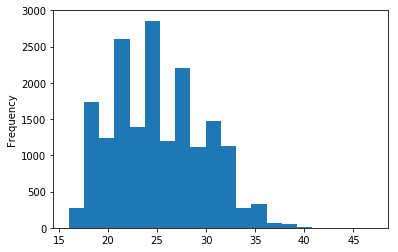

In [43]:
#distribuições de Idade
data.Age.plot(kind='hist', bins=20)

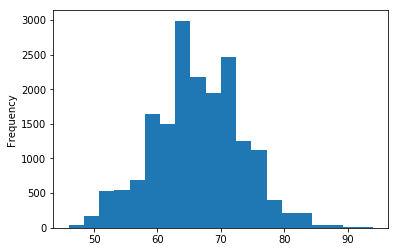

In [44]:
#distribuições de Overall
data.Overall.plot(kind='hist', bins=20)

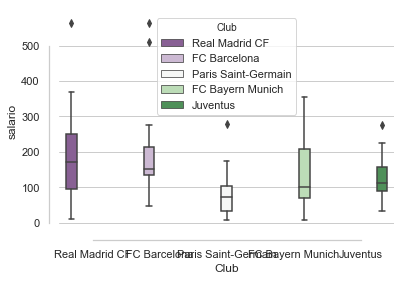

In [48]:
#box plot para analisar salarios dos melhores clubs
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x="Club", y="salario", hue="Club", data=melhoresClubs, palette="PRGn")
sns.despine(offset=10, trim=True)

Text(0.5, 1.0, 'Clubes com os melhores jogadores')

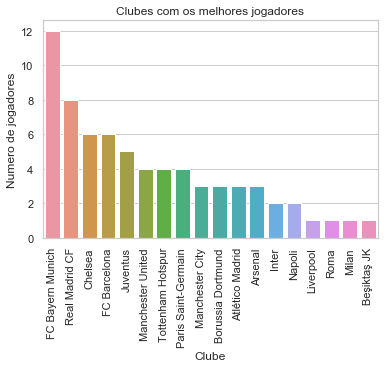

In [50]:
#Melhores clubes baseado em seu Overall
best = data[data['Overall']> 85]
grouped = best.groupby('Club')
count_by_club = grouped.count()['Name'].sort_values(ascending = False)
 
ax = sns.countplot(x = 'Club', data = best, order = count_by_club.index)
ax.set_xticklabels(labels = count_by_club.index, rotation='vertical')
ax.set_ylabel('Numero de jogadores')
ax.set_xlabel('Clube')
ax.set_title('Clubes com os melhores jogadores')